# Linear Regression

<!-- ![Linear regression image](https://production-media.paperswithcode.com/methods/2560px-Linear_regression.svg_wwqz1f3.png) -->

![Linear Regression](../data/linear_regression.png)

![ML System](../data/ML_System.png)



https://github.com/42-AI/bootcamp_machine-learning

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, widgets
import matplotlib.colors as mcolors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


import pickle

with open("Teach_linear_regression.pkl", "rb") as f:
    (
        x, y, COEF_A, COEF_B,
        COEF_A_MIN, COEF_A_MAX,
        COEF_B_MIN, COEF_B_MAX,
        WORST_A_PARAM, WORST_B_PARAM,
        MIN_COST, MAX_COST,
        MIN_VALUE, MAX_VALUE, NB_ELEMENTS,
    ) = pickle.load(f)

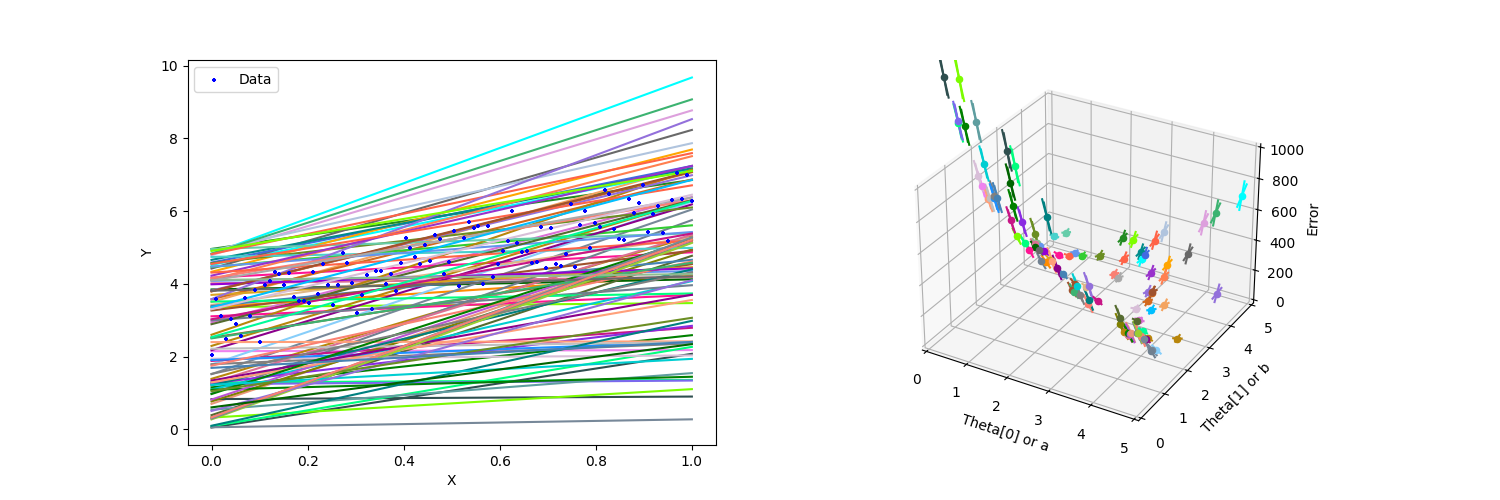

In [39]:
%matplotlib widget


fig = plt.figure(figsize=(15, 5))
# fig.suptitle("A tale of 2 subplots")
ax_2d = fig.add_subplot(1, 2, 1)
ax_3d = fig.add_subplot(1, 2, 2, projection="3d")
cmap = plt.get_cmap("winter")
MAX_ERROR = 300


def predict(x, thetas):
    a, b = thetas
    y_hat = a * x + b
    return y_hat


def get_cost(y, y_hat):
    return ((y - y_hat) ** 2).sum()


def plot_linear_regression_3D(x, y, thetas, show_errors=False, color=None):
    y_hat = predict(x, thetas)
    cost = get_cost(y, y_hat)
    ax_2d.plot(x, y_hat, c=cmap(cost / 300) if color is None else color, zorder=-1)
    ax_2d.set_xlabel("X")
    ax_2d.set_ylabel("Y")
    # ax_2d.title(f"Error = {error}")
    return cost

def plot_cost_3d(cost, thetas, x, y, color=None):
    ax_3d.scatter(
        thetas[0],
        thetas[1],
        zs=cost,
        c=cmap(cost / 300) if color is None else color,
        # s=.01,
        # marker="+",
        # zdir="z",
        # c=c_list,
        label=f"θ({thetas[0]:.2f}, {thetas[1]:.2f}) cost={int(cost)}",
    )
    epsilon = 1e-1
    thetas_a = thetas.copy() - epsilon
    thetas_b = thetas.copy() + epsilon
    y_hat_a = predict(x, thetas_a)
    cost_a = get_cost(y, y_hat_a)
    y_hat_b = predict(x, thetas_b)
    cost_b = get_cost(y, y_hat_b)
    ax_3d.plot(
        (thetas_a[0], thetas_b[0]),
        (thetas[1], thetas[1]),
        (cost_a, cost_b),
        c=cmap(cost / 300) if color is None else color,
	)
    ax_3d.plot(
        (thetas[0], thetas[0]),
        (thetas_a[1], thetas_b[1]),
        (cost_a, cost_b),
        c=cmap(cost / 300) if color is None else color,
	)
    # ax_3d.legend()
    ax_3d.set_xlim(COEF_A_MIN, COEF_A_MAX)
    ax_3d.set_ylim(COEF_B_MIN, COEF_B_MAX)
    ax_3d.set_zlim(0, 1000)
    ax_3d.set_xlabel("Theta[0] or a")
    ax_3d.set_ylabel("Theta[1] or b")
    ax_3d.set_zlabel("Error")

import random
import matplotlib.colors as mcolors

def perceived_brightness(hex_color):
    # Convert hex to RGB
    rgb = mcolors.to_rgb(hex_color)
    # Calculate perceived brightness
    return (0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2])

def random_named_color(min_brightness=0.2, max_brightness=0.8):
    colors = list(mcolors.CSS4_COLORS.items())
    while True:
        name, hex_color = random.choice(colors)
        brightness = perceived_brightness(hex_color)
        if min_brightness <= brightness <= max_brightness:
            return name

# Usage
color = random_named_color()

ax_2d.scatter(x, y, c="b", s=5, marker="+", zorder=1, label="Data")

for _ in range(100):
    a = (random.random() - COEF_A_MIN) * COEF_A_MAX
    b = (random.random() - COEF_B_MIN) * COEF_B_MAX
    thetas = np.array((a, b))
    color = random_named_color()
    # color = None
    cost = plot_linear_regression_3D(x, y, thetas, color=color)
    plot_cost_3d(cost, thetas, x, y, color=color)

ax_2d.legend()